In [30]:
import pandas as pd
import numpy as np

cannabis = pd.read_csv("cannabis.csv")

In [31]:
cannabis.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [32]:
cannabis_clean = pd.read_csv("cannabis_full.csv")
cannabis_clean = cannabis_clean.dropna().reset_index(drop=True)


## Part One

In [33]:
cannabis_si = cannabis_clean[cannabis_clean["Type"].isin(["sativa", "indica"])]
cannabis_si = cannabis_si.dropna().reset_index(drop=True)
cannabis_si.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.model_selection import train_test_split

X = cannabis_si.drop(columns=["Type","Strain","Effects","Flavor"])
y = cannabis_si["Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


LDA

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

lda_cv = cross_val_score(lda, X_train, y_train, cv=5, scoring="accuracy")
print("LDA CV Accuracy:", lda_cv.mean())

lda_pred = lda.predict(X_test)

print(confusion_matrix(y_test, lda_pred))

LDA CV Accuracy: 0.8536222910216716
[[123   9]
 [ 19  63]]


QDA

In [36]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

param_grid = {"reg_param": [0, 0.01, 0.1, 0.3, 0.5]}

grid_qda = GridSearchCV(qda, param_grid, cv=5, scoring="accuracy")
grid_qda.fit(X_train, y_train)

print("Best QDA Params:", grid_qda.best_params_)
print("QDA CV Accuracy:", grid_qda.best_score_)

qda_final = grid_qda.best_estimator_
qda_pred = qda_final.predict(X_test)

print(confusion_matrix(y_test, qda_pred))


C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\U

Best QDA Params: {'reg_param': 0.1}
QDA CV Accuracy: 0.8629927760577913
[[120  12]
 [ 12  70]]


SVC

In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svc_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

param_grid = {
    "svc__C": [0.1, 1, 10],
    "svc__gamma": ["scale", 0.1, 0.01],
    "svc__kernel": ["rbf", "linear"]
}

grid_svc = GridSearchCV(svc_pipe, param_grid, cv=5, scoring="accuracy")
grid_svc.fit(X_train, y_train)

print("Best SVC Params:", grid_svc.best_params_)
print("SVC CV Accuracy:", grid_svc.best_score_)

svc_final = grid_svc.best_estimator_
svc_pred = svc_final.predict(X_test)

print(confusion_matrix(y_test, svc_pred))


Best SVC Params: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
SVC CV Accuracy: 0.8524664602683177
[[122  10]
 [ 17  65]]


SVM

In [38]:
svm_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly"))
])

param_grid = {
    "svm__C": [0.1, 1, 10],
    "svm__degree": [2, 3, 4],
    "svm__gamma": ["scale", 0.1, 0.01]
}

grid_svm = GridSearchCV(svm_poly, param_grid, cv=5, scoring="accuracy")
grid_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("SVM CV Accuracy:", grid_svm.best_score_)

svm_final = grid_svm.best_estimator_
svm_pred = svm_final.predict(X_test)

print(confusion_matrix(y_test, svm_pred))


Best SVM Params: {'svm__C': 0.1, 'svm__degree': 3, 'svm__gamma': 0.1}
SVM CV Accuracy: 0.8337117303061575
[[117  15]
 [ 20  62]]


## Part Two

In [39]:
X = cannabis_clean.drop(columns=["Type","Strain","Effects","Flavor"])
y = cannabis_clean["Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy")
grid_dt.fit(X_train, y_train)

print("Best DT Params:", grid_dt.best_params_)
print("Best CV Accuracy:", grid_dt.best_score_)

dt_final = grid_dt.best_estimator_


Best DT Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.6381343101343101


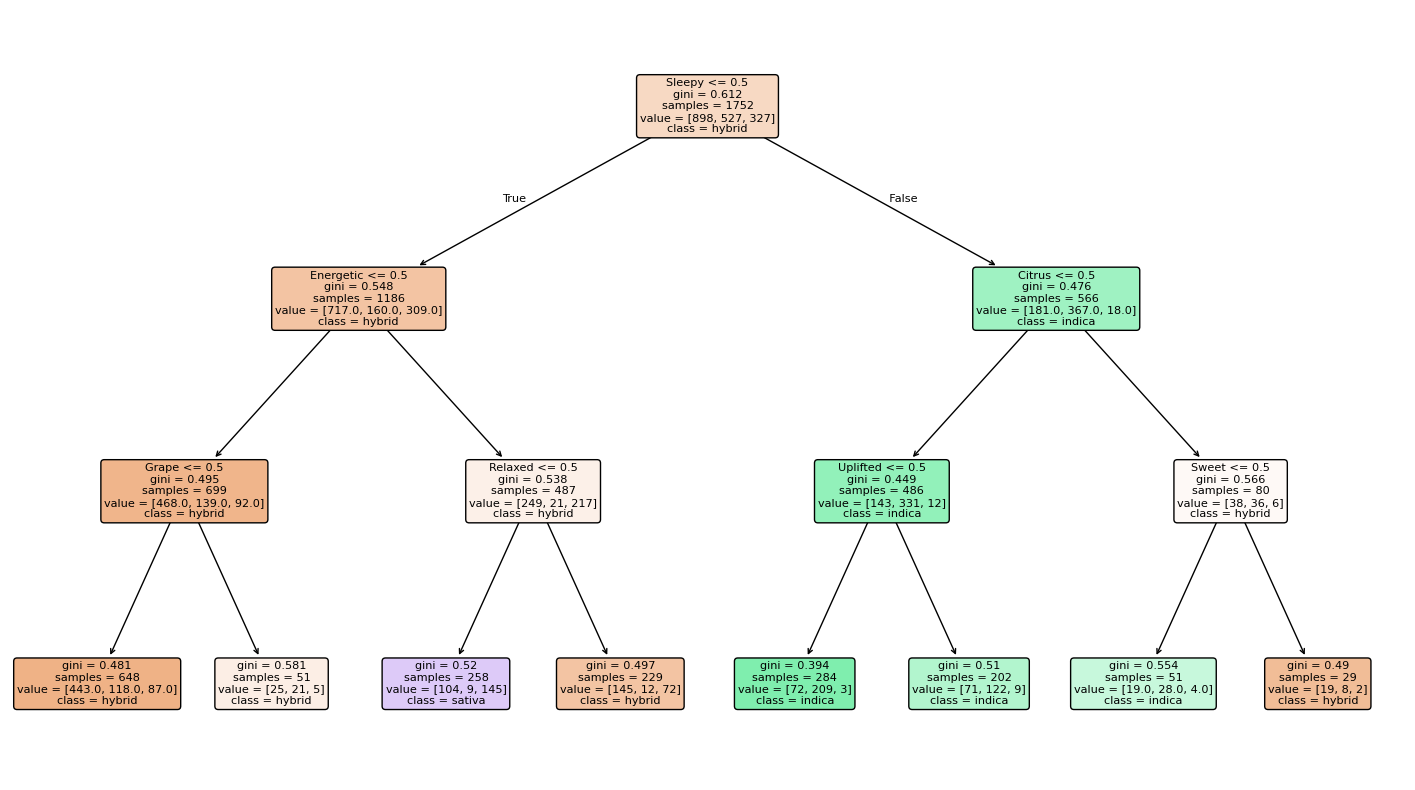

In [41]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
tree.plot_tree(
    dt_final,
    feature_names=X.columns,
    class_names=dt_final.classes_,
    filled=True,
    rounded=True
)
plt.show()

In [42]:
dt_pred = dt_final.predict(X_test)
print(confusion_matrix(y_test, dt_pred))


[[150  47  28]
 [ 47  84   1]
 [ 51   9  22]]


In [43]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

lda_cv = cross_val_score(lda, X_train, y_train, cv=5, scoring="accuracy")
print("LDA CV Accuracy:", lda_cv.mean())

lda_pred = lda.predict(X_test)
print(confusion_matrix(y_test, lda_pred))


LDA CV Accuracy: 0.6369768009768009
[[141  52  32]
 [ 43  87   2]
 [ 48   8  26]]


In [44]:
qda = QuadraticDiscriminantAnalysis()

param_grid = {"reg_param": [0, 0.01, 0.1, 0.3, 0.5]}
grid_qda = GridSearchCV(qda, param_grid, cv=5, scoring="accuracy")
grid_qda.fit(X_train, y_train)

print("Best QDA Params:", grid_qda.best_params_)
print("QDA CV Accuracy:", grid_qda.best_score_)

qda_final = grid_qda.best_estimator_
qda_pred = qda_final.predict(X_test)

print(confusion_matrix(y_test, qda_pred))

C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\U

Best QDA Params: {'reg_param': 0.3}
QDA CV Accuracy: 0.640984940984941
[[169  42  14]
 [ 44  87   1]
 [ 59   5  18]]


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

param_grid = {
    "knn__n_neighbors": [3, 5, 7, 11, 15],
    "knn__weights": ["uniform", "distance"]
}

grid_knn = GridSearchCV(knn_pipe, param_grid, cv=5, scoring="accuracy")
grid_knn.fit(X_train, y_train)

print("Best KNN Params:", grid_knn.best_params_)
print("KNN CV Accuracy:", grid_knn.best_score_)

knn_final = grid_knn.best_estimator_
knn_pred = knn_final.predict(X_test)

print(confusion_matrix(y_test, knn_pred))

C:\Users\tyler\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\tyler\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\tyler\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tyler\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Best KNN Params: {'knn__n_neighbors': 15, 'knn__weights': 'uniform'}
KNN CV Accuracy: 0.575905575905576
[[178  38   9]
 [ 68  64   0]
 [ 62  10  10]]


## Part Three